In [1]:
import pandas as pd

In [2]:
data = {"Team": ["Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Red Sox", "Yankees", "Yankees", "Yankees", "Yankees", "Yankees", "Yankees"],
		"Pos": ["Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher", "Pitcher", "Pitcher", "Pitcher", "Not Pitcher", "Not Pitcher", "Not Pitcher"],
		"Age": [24, 28, 40, 22, 29, 33, 31, 26, 21, 36, 25, 31]}
df = pd.DataFrame(data)
print(df)

       Team          Pos  Age
0   Red Sox      Pitcher   24
1   Red Sox      Pitcher   28
2   Red Sox      Pitcher   40
3   Red Sox  Not Pitcher   22
4   Red Sox  Not Pitcher   29
5   Red Sox  Not Pitcher   33
6   Yankees      Pitcher   31
7   Yankees      Pitcher   26
8   Yankees      Pitcher   21
9   Yankees  Not Pitcher   36
10  Yankees  Not Pitcher   25
11  Yankees  Not Pitcher   31


In [4]:
df

,Team,Pos,Age
0,Red Sox,Pitcher,24
1,Red Sox,Pitcher,28
2,Red Sox,Pitcher,40
3,Red Sox,Not Pitcher,22
4,Red Sox,Not Pitcher,29
5,Red Sox,Not Pitcher,33
6,Yankees,Pitcher,31
7,Yankees,Pitcher,26
8,Yankees,Pitcher,21
9,Yankees,Not Pitcher,36


In [5]:
grouped_single = df.groupby('Team').agg({'Age': ['mean', 'min', 'max']})


In [10]:
grouped_single

,Team,age_mean,age_min,age_max
0,Red Sox,29.333333,22,40
1,Yankees,28.333333,21,36


In [7]:
grouped_single.columns = ['age_mean', 'age_min', 'age_max']

In [9]:
grouped_single = grouped_single.reset_index()

In [11]:
grouped_multiple = df.groupby(['Team', 'Pos']).agg({'Age': ['mean', 'min', 'max']})
grouped_multiple.columns = ['age_mean', 'age_min', 'age_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

      Team          Pos   age_mean  age_min  age_max
0  Red Sox  Not Pitcher  28.000000       22       33
1  Red Sox      Pitcher  30.666667       24       40
2  Yankees  Not Pitcher  30.666667       25       36
3  Yankees      Pitcher  26.000000       21       31


In [12]:
phonedata = pd.read_csv('phone_data.csv')

In [18]:
phonedata['date'] = phonedata['date'].apply(lambda x : pd.Timestamp.strptime(x, '%d/%m/%y %H:%M'))

In [22]:
phonedata['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [23]:
phonedata.groupby(['month']).groups.keys()


dict_keys(['2014-11', '2014-12', '2015-01', '2015-02', '2015-03'])

In [25]:
phonedata.groupby(['month']).first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [26]:
phonedata.groupby(['month']).last()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,230,2014-11-13 22:31:00,1.000,sms,Vodafone,mobile
2014-12,388,2014-12-14 19:54:00,25.000,call,Three,mobile
2015-01,593,2015-01-14 23:36:00,1.000,sms,Three,mobile
2015-02,728,2015-02-12 06:58:00,34.429,data,data,data
2015-03,829,2015-03-14 00:16:00,1.000,sms,world,world


In [34]:
phonedata.groupby(['month', 'item']).agg({'date': 'count'})

date
month   item      
2014-11 call   107
        data    29
        sms     94
2014-12 call    79
        data    30
        sms     48
2015-01 call    88
        data    31
        sms     86
2015-02 call    67
        data    31
        sms     39
2015-03 call    47
        data    29
        sms     25

In [33]:
phonedata.groupby(['month', 'network_type']).agg({'date': 'count'})

date
month   network_type      
2014-11 data            29
        landline         5
        mobile         189
        special          1
        voicemail        6
2014-12 data            30
        landline         7
        mobile         108
        voicemail        8
        world            4
2015-01 data            31
        landline        11
        mobile         160
        voicemail        3
2015-02 data            31
        landline         8
        mobile          90
        special          2
        voicemail        6
2015-03 data            29
        landline        11
        mobile          54
        voicemail        4
        world            3

In [32]:
phonedata.groupby('month', as_index=False).agg({"duration": "sum"})


,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [37]:
# Group the data frame by month and item and extract a number of stats from each group
phonedata.groupby(
   ['month', 'item']
).agg(
    {
         'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [42]:
# Define the aggregation procedure outside of the groupby operation
aggregations = {
    'duration':'sum',
    'date': lambda x: max(x) - pd.DateOffset(days=1)
}
phonedata.groupby('month').agg(aggregations)


,duration,date
month,,
2014-11,26639.441,2014-11-12 22:31:00
2014-12,14641.870,2014-12-13 19:54:00
2015-01,18223.299,2015-01-13 23:36:00
2015-02,15522.299,2015-02-11 06:58:00
2015-03,22750.441,2015-03-13 00:16:00


In [43]:
# Group the data frame by month and item and extract a number of stats from each group
phonedata.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [49]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [51]:
planets.isna().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

In [52]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [54]:
planets.dropna().describe(include='O')

,method
count,498
unique,2
top,Radial Velocity
freq,497


In [58]:
planets.describe(include='O')

,method
count,1035
unique,10
top,Radial Velocity
freq,553


In [56]:
planets.method.unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [55]:
planets.groupby('method')['orbital_period'].median()


method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [60]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.000000
       Eclipse Timing Variations           9.000000
       Imaging                            38.000000
       Microlensing                       23.000000
       Orbital Brightness Modulation       3.000000
       Pulsar Timing                       5.000000
       Pulsation Timing Variations         1.000000
       Radial Velocity                   553.000000
       Transit                           397.000000
       Transit Timing Variations           4.000000
mean   Astrometry                       2011.500000
       Eclipse Timing Variations        2010.000000
       Imaging                          2009.131579
       Microlensing                     2009.782609
       Orbital Brightness Modulation    2011.666667
       Pulsar Timing                    1998.400000
       Pulsation Timing Variations      2007.000000
       Radial Velocity                  2007.518987
       Transit             

In [63]:
import numpy as np
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [66]:
df.groupby('key').aggregate(['min', 'median', 'max'])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [67]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [71]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [70]:
def fil nter_func(x):
    return x['data2'].std() > 4

display('df', "df.groupby('key').std()", "df.groupby('key').filter(filter_func)")


df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

In [72]:
df.groupby('key').filter(filter_func)

,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


In [74]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [78]:
df.groupby('key').groups.values()

dict_values([Int64Index([0, 3], dtype='int64'), Int64Index([1, 4], dtype='int64'), Int64Index([2, 5], dtype='int64')])

In [73]:
df.groupby('key').transform(lambda x: x - x.mean())


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


In [85]:
df.groupby('key').apply(lambda x : x['data2'])

key   
A    0    5
     3    3
B    1    0
     4    7
C    2    3
     5    9
Name: data2, dtype: int64

In [86]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9
,key,data1,data2
0,A,0.000000,5
1,B,0.142857,0
2,C,0.166667,3


In [88]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
consonant,12,19
vowel,3,8


In [89]:
L = [0, 1, 0, 1, 2, 0]
display('df', 'df.groupby(L).sum()')

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby(L).sum()
   data1  data2
0      7     17
1      4      3
2      4      7

In [90]:
display('df2', 'df2.groupby(str.lower).mean()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
a,1.5,4.0
b,2.5,3.5


In [98]:
planets['year']

0       2006
1       2008
2       2011
3       2007
4       2009
5       2008
6       2002
7       1996
8       2008
9       2010
10      2010
11      2009
12      2008
13      1996
14      2001
15      2009
16      1995
17      1996
18      2004
19      2002
20      2011
21      2007
22      2009
23      2009
24      2009
25      1996
26      2012
27      2008
28      2013
29      2005
        ... 
1005    2012
1006    2012
1007    2012
1008    2012
1009    2012
1010    2012
1011    2012
1012    2012
1013    2012
1014    2012
1015    2012
1016    2013
1017    2012
1018    2012
1019    2012
1020    2012
1021    2013
1022    2012
1023    2012
1024    2012
1025    2012
1026    2014
1027    2011
1028    2012
1029    2012
1030    2006
1031    2007
1032    2007
1033    2008
1034    2008
Name: year, Length: 1035, dtype: int64

In [100]:
decade = 10 * (planets['year'] // 10)
decade.astype(str) + 's'

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
5       2000s
6       2000s
7       1990s
8       2000s
9       2010s
10      2010s
11      2000s
12      2000s
13      1990s
14      2000s
15      2000s
16      1990s
17      1990s
18      2000s
19      2000s
20      2010s
21      2000s
22      2000s
23      2000s
24      2000s
25      1990s
26      2010s
27      2000s
28      2010s
29      2000s
        ...  
1005    2010s
1006    2010s
1007    2010s
1008    2010s
1009    2010s
1010    2010s
1011    2010s
1012    2010s
1013    2010s
1014    2010s
1015    2010s
1016    2010s
1017    2010s
1018    2010s
1019    2010s
1020    2010s
1021    2010s
1022    2010s
1023    2010s
1024    2010s
1025    2010s
1026    2010s
1027    2010s
1028    2010s
1029    2010s
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

In [105]:
decade.value_counts()

2010    597
2000    406
1990     31
1980      1
Name: year, dtype: int64

In [113]:
planets.groupby(['method', decade])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [115]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum()


method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [116]:
import seaborn as sns

In [117]:
planets.corr()

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


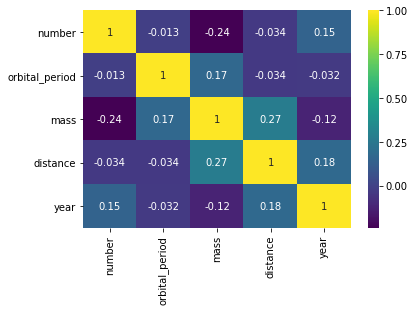

In [119]:
sns.heatmap(planets.corr(), annot = True, cmap='viridis')